<a href="https://colab.research.google.com/github/Shivamgond2022/demo/blob/main/Assignment_4_ML_50Startup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4 Multi Linear Regration
## Problemstatment
- Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.stats.tests.test_influence
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Data collaction and cheaking it correlation

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data set folder/50_Startups - Copy.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.rename(columns={"R&D Spend":"R_D","Administration":"Admin","Marketing Spend":"M_S"},inplace=True)

In [ ]:
df.shape

(50, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R_D     50 non-null     float64
 1   Admin   50 non-null     float64
 2   M_S     50 non-null     float64
 3   State   50 non-null     object 
 4   Profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

# We are converting our column 'State' in dummy format because it has 'String' values

In [ ]:
df1=pd.get_dummies(df,columns=['State'])
df1.head()

,R_D,Admin,M_S,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [ ]:
df1.describe()

,R_D,Admin,M_S,Profit,State_California,State_Florida,State_New York
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200,0.340000,0.320000,0.340000
std,45902.256482,28017.802755,122290.310726,40306.180338,0.478518,0.471212,0.478518
min,0.000000,51283.140000,0.000000,14681.400000,0.000000,0.000000,0.000000
25%,39936.370000,103730.875000,129300.132500,90138.902500,0.000000,0.000000,0.000000
50%,73051.080000,122699.795000,212716.240000,107978.190000,0.000000,0.000000,0.000000
75%,101602.800000,144842.180000,299469.085000,139765.977500,1.000000,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,192261.830000,1.000000,1.000000,1.000000


In [ ]:
df1.rename(columns={"State_New York":"State_NY"},inplace=True)

In [ ]:
df1.isna().sum()

R_D                 0
Admin               0
M_S                 0
Profit              0
State_California    0
State_Florida       0
State_NY            0
dtype: int64

In [ ]:
df1.corr()

,R_D,Admin,M_S,Profit,State_California,State_Florida,State_NY
R_D,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Admin,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
M_S,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_NY,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


**Here our target variable is "Profit" and inputs are "R&D Spend, Administration, Marketing Spend, State_California, State_Florida, State_New York"**	

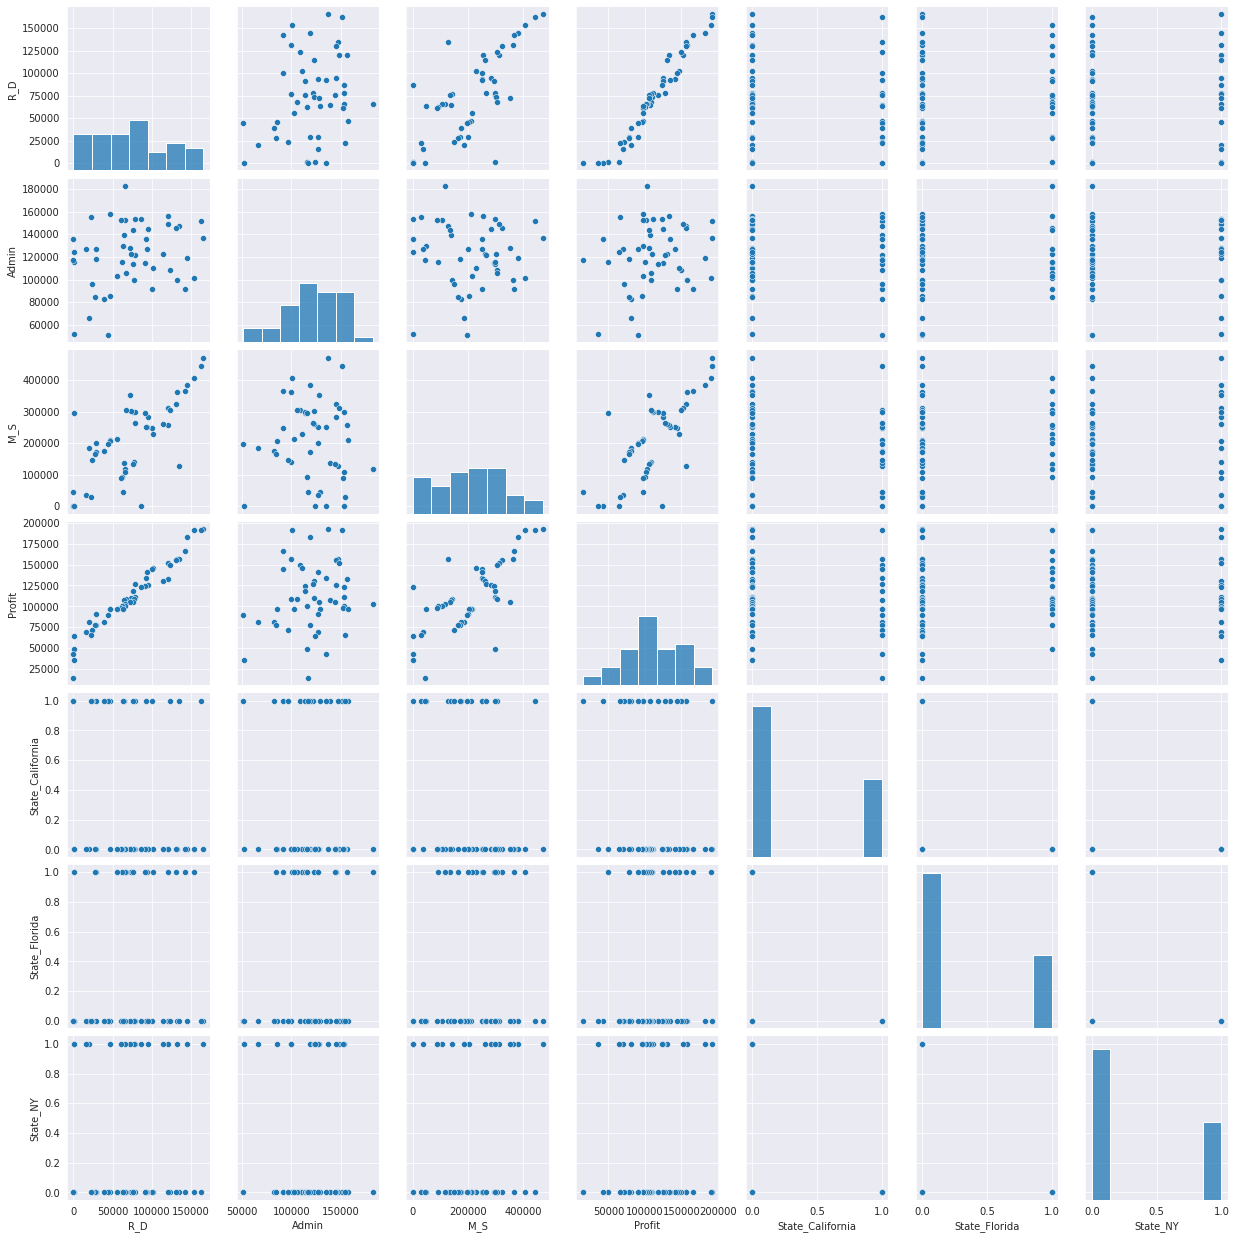

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(df1)

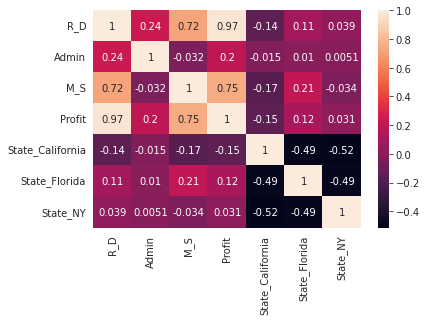

In [ ]:
sns.heatmap(df1.corr(), annot=True)

# Building model

In [ ]:
model = smf.ols('Profit~R_D+Admin+M_S	+State_California+State_Florida+State_NY', data=df1).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           1.34e-27
Time:                        08:42:38   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
R_D                  0.8060      0.046     17.369      0.000       0.712       0.900
Admin               -0.0270      0.052     -0.517      0.608      -0.132       0.078
M_S                  0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
State_Florida     1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
State_NY          1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     3.48e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.2e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Observation :- As we can see our R sq value and p-values are good and model may be accepted but not all p-value be acceptable as they have heigher significant value**
- **Variable "Admin" is insignificant to predict "Profit" as p-value is > significant value (0.05). We can also drop this variable**

# Cheaking the Normality 

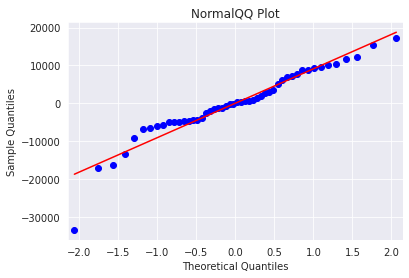

In [ ]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='r')
plt.title("NormalQQ Plot")
plt.show()

**Observation :- As our model is skewed to word the left and one outlier is present in the model.**

# Finding multicollinearity by VIF

# Calculating VIF for model

In [ ]:
rsq_rd=smf.ols('R_D~Admin+M_S	+State_California+State_Florida+State_NY',data=df1).fit().rsquared
vif_rd=1/(1-rsq_rd)
vif_rd

2.4955109215494433

In [ ]:
rsq_admin=smf.ols('Admin~R_D+M_S+State_California+State_Florida+State_NY',data=df1).fit().rsquared
vif_admin=1/(1-rsq_admin) # 
vif_admin


1.177766050899384

In [ ]:
rsq_ms=smf.ols('M_S~R_D+Admin+State_California+State_Florida+State_NY',data=df1).fit().rsquared
vif_ms=1/(1-rsq_ms) # 
vif_ms


2.4167967566863933

In [ ]:
Vif= {"Variabel":["R_D","Admin", "M_S"], 'VIF':[vif_rd,vif_admin,vif_ms]}
vif_fram=pd.DataFrame(Vif)
vif_fram

,Variabel,VIF
0,R_D,2.495511
1,Admin,1.177766
2,M_S,2.416797


**As we can see "Admin" has lowest variance inflation facter So, we can remove "admin" variable to improve our model**

# Finding multicollinearity with Cook's Distance

In [ ]:
model_infl=model.get_influence()
(c, _)=model_infl.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


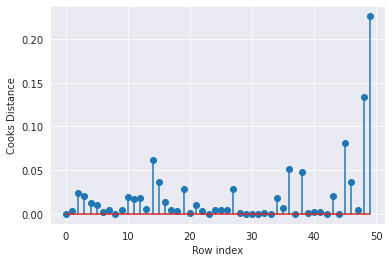

In [ ]:
#Ploting the influencers values using stem plot
plt.stem(np.arange(len(df1)),np.round(c, 3))
plt.xlabel("Row index")
plt.ylabel("Cooks Distance")
plt.show()

In [ ]:
(np.argmax(c), np.max(c))

(49, 0.22625094501509282)

**Since the value is < 1, but still we can drop the "49" row from the dataset and re-biuld the model** 

# Dropping the row

In [ ]:
# Dropping 49 row from dataset
df1.drop(index=[49],inplace=True)

#Building Final model after dopping 49th row and "Admin" variabel

In [ ]:
model2 = smf.ols('Profit~R_D+M_S+State_California+State_Florida+State_NY',data=df1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     275.3
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           1.60e-30
Time:                        08:42:39   Log-Likelihood:                -506.11
No. Observations:                  49   AIC:                             1022.
Df Residuals:                      44   BIC:                             1032.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.722e+04   1805.972     20.607      0.000    3.36e+04    4.09e+04
R_D                  0.7760      0.036     21.721      0.000       0.704       0.848
M_S                  0.0281      0.013      2.082      0.043       0.001       0.055
State_California  1.359e+04   1647.590      8.249      0.000    1.03e+04    1.69e+04
State_Florida     1.197e+04   1812.249      6.608      0.000    8322.556    1.56e+04
State_NY          1.165e+04   1659.753      7.019      0.000    8305.166     1.5e+04
==============================================================================
Omnibus:                        0.123   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.940   Jarque-Bera (JB):                0.292
Skew:                           0.093   Prob(JB):                        0.864
Kurtosis:                       2.670   Cond. No.                     6.06e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.96e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Our model performance get improved after removeing variabel and row**

# Predicting the model

In [ ]:
df_pred=pd.DataFrame({'R_D':400000,"M_S":200000,"State_California":0,"State_Florida":1,"State_NY":0},index=[1])

In [ ]:
model2.predict(df_pred)

1    365191.309112
dtype: float64

# Sq Root Transfomtion

In [ ]:
#Sq root transformation of input variabals
sq_X=np.sqrt(df1[["R_D","M_S","State_California","State_Florida","State_NY"]])

In [ ]:
model3=smf.ols("Profit~sq_X",data=df1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     95.09
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           4.59e-21
Time:                        08:42:39   Log-Likelihood:                -530.44
No. Observations:                  49   AIC:                             1071.
Df Residuals:                      44   BIC:                             1080.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.469e+04   4134.135      3.553      0.001    6357.600     2.3e+04
sq_X[0]      338.2530     25.309     13.365      0.000     287.247     389.259
sq_X[1]       18.4058     15.127      1.217      0.230     -12.080      48.892
sq_X[2]     4901.7067   2847.632      1.721      0.092    -837.319    1.06e+04
sq_X[3]     3657.2704   3237.662      1.130      0.265   -2867.808    1.02e+04
sq_X[4]     6130.4252   2835.762      2.162      0.036     415.322    1.18e+04
==============================================================================
Omnibus:                        6.630   Durbin-Watson:                   0.774
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.272
Skew:                           0.876   Prob(JB):                       0.0435
Kurtosis:                       3.052   Cond. No.                     6.53e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.28e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#Sq transformation of output variabale
sq_Y = np.sqrt(df1["Profit"])

In [ ]:
model4=smf.ols('sq_Y~R_D+M_S+State_California+State_Florida+State_NY',data=df1).fit()

In [ ]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   sq_Y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     189.5
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           3.99e-27
Time:                        08:42:39   Log-Likelihood:                -197.00
No. Observations:                  49   AIC:                             404.0
Df Residuals:                      44   BIC:                             413.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          177.0304      3.289     53.832      0.000     170.403     183.658
R_D                  0.0012    6.5e-05     18.242      0.000       0.001       0.001
M_S               3.463e-05   2.46e-05      1.410      0.165   -1.49e-05    8.41e-05
State_California    60.5197      3.000     20.172      0.000      54.473      66.566
State_Florida       59.4193      3.300     18.006      0.000      52.769      66.070
State_NY            57.0913      3.022     18.890      0.000      51.000      63.182
==============================================================================
Omnibus:                       11.160   Durbin-Watson:                   1.188
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.786
Skew:                          -0.899   Prob(JB):                      0.00276
Kurtosis:                       4.593   Cond. No.                     6.06e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.96e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#Sq root transformation of input as well as output varibal
model5=smf.ols('sq_Y~sq_X',data=df1).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   sq_Y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     165.8
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           6.33e-26
Time:                        08:42:39   Log-Likelihood:                -200.09
No. Observations:                  49   AIC:                             410.2
Df Residuals:                      44   BIC:                             419.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    139.4994      4.880     28.585      0.000     129.664     149.335
sq_X[0]        0.5306      0.030     17.760      0.000       0.470       0.591
sq_X[1]        0.0256      0.018      1.436      0.158      -0.010       0.062
sq_X[2]       46.4992      3.362     13.833      0.000      39.725      53.274
sq_X[3]       45.3493      3.822     11.866      0.000      37.647      53.052
sq_X[4]       47.6508      3.348     14.235      0.000      40.904      54.397
==============================================================================
Omnibus:                       10.783   Durbin-Watson:                   1.373
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.488
Skew:                           0.983   Prob(JB):                      0.00528
Kurtosis:                       4.129   Cond. No.                     6.53e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.28e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
model4.predict(df_pred)

1    718.030062
dtype: float64